# Multiple Linear Regression
## (With cost function and gradient descent for optimization)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Normalization

In [2]:
def normalize(x):
    """
    Normalizes a given dataset.

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors; n = features in each example/vector

    Returns:
    - x_norm: Normalized features matrix
    """
    x_min = np.min(x, axis=0)
    x_max = np.max(x, axis=0)
    x_norm = (x - x_min) / (x_max - x_min)
    
    return x_norm

## Variables declaration

In [3]:
# Característica 1: size (rango de 1000 a 3000)
size = np.random.randint(1000, 3001, 20)

# Característica 2: rooms (rango de 1 a 5)
rooms = np.random.randint(1, 6, 20)

# Característica 3: floor (rango de 1 a 3)
floor = np.random.randint(1, 4, 20)

# Característica 4: age (rango de 1 a 50)
age = np.random.randint(1, 51, 20)

# Crear la matriz x_train concatenando las características
x_train = np.column_stack((size, rooms, floor, age))
nx_train = normalize(x_train)
x_features = ["Size","Rooms", "Floors", "Age"]
y_train = (np.random.random(20) * 1000).round(2)
w = (np.random.random(4) * 1000).round(2)
b = np.random.random() * 1000
epochs = 1000
alpha = 0.00001
m,n = x_train.shape
print(x_features)
print("Features: ", nx_train.round(2))
print("Targets: ", y_train)
print("\nWeights: ", w)
print("Bias: ", b)
print("Learning Rate: ",alpha)
print("Matrix Size: ",m,"x",n)

['Size', 'Rooms', 'Floors', 'Age']
Features:  [[0.13 0.   0.   0.2 ]
 [0.27 0.75 1.   1.  ]
 [0.   0.   0.   0.2 ]
 [0.52 0.   0.5  0.73]
 [0.92 0.75 0.   0.41]
 [0.26 0.25 1.   0.56]
 [0.36 0.25 0.5  0.12]
 [0.2  0.   0.5  0.2 ]
 [1.   0.25 0.   0.56]
 [0.76 1.   1.   0.37]
 [0.32 0.75 0.5  0.73]
 [0.12 0.5  1.   0.59]
 [0.75 1.   1.   0.73]
 [0.91 1.   0.   0.1 ]
 [0.02 0.25 1.   0.  ]
 [0.27 0.   1.   0.1 ]
 [0.57 0.75 0.   0.49]
 [0.44 0.75 0.5  0.37]
 [0.71 0.   0.   0.83]
 [0.29 0.75 0.5  0.07]]
Targets:  [191.71 167.8  163.88 790.65  93.61 292.48 983.53 607.15 694.9  323.91
 368.74 285.5  664.76 414.66 151.77 169.83 710.39 766.3  390.59 149.03]

Weights:  [871.47 731.74 299.35 331.38]
Bias:  485.6329979877393
Learning Rate:  1e-05
Matrix Size:  20 x 4


## Ploting the Dataset

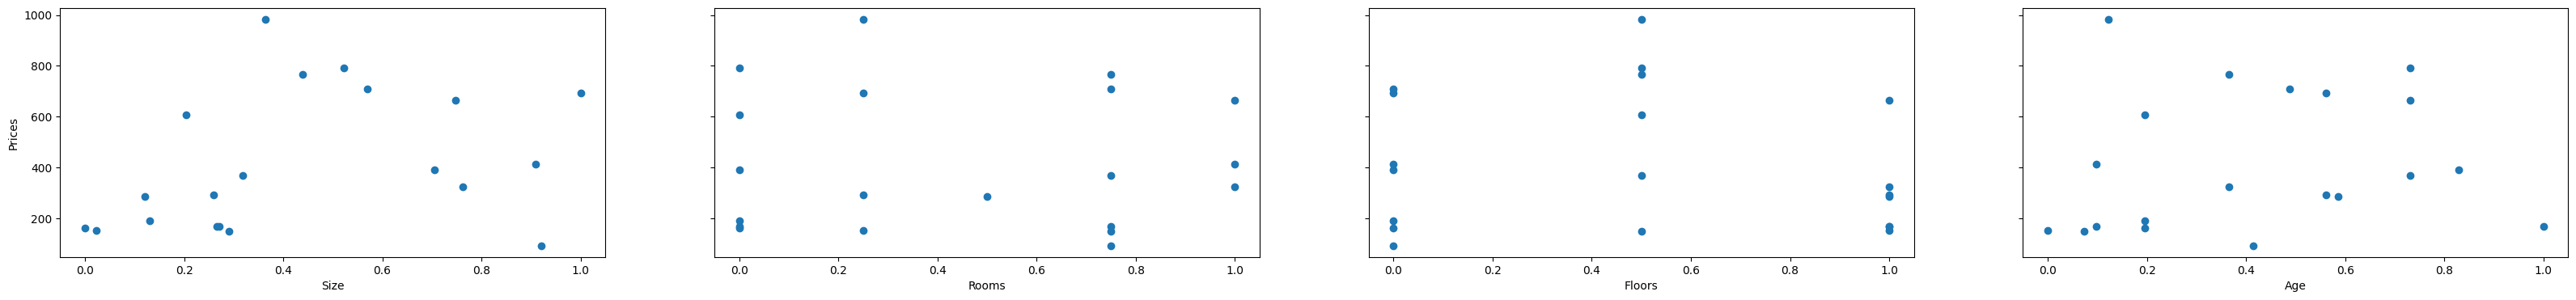

In [4]:
fig,ax = plt.subplots(1,n, figsize=(40,4),sharey=True)
for i in range(n):
    ax[i].scatter(nx_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
    #for j in range(m):
    #    ax[i].annotate(f"P{j}",(nx_train[j,i],y_train[j]),ha='center')
ax[0].set_ylabel("Prices")
plt.show()

## Linear Regression prediction

In [5]:
def multipleLR(x, w, b):
    # w = np.array[weight1, weight 2, weight 3....weight n]
    # x = np.array[[x1, x2, x3...xn]
    #              [x1.....xn]
    #              [x1.....xn]
    #              [x1.....xn]]
    # b = floatValue/Scalar
    p = np.dot(x, w)
    
    p += b
    
    return p  

[191.71 167.8  163.88 790.65  93.61 292.48 983.53 607.15 694.9  323.91
 368.74 285.5  664.76 414.66 151.77 169.83 710.39 766.3  390.59 149.03]
[ 663.79 1901.78  550.29 1332.26 1974.4  1379.79 1175.32  877.81 1725.93
 2302.2  1703.73 1449.71 2410.77 2042.13  987.68 1048.86 1692.62 1688.39
 1375.02 1461.19]


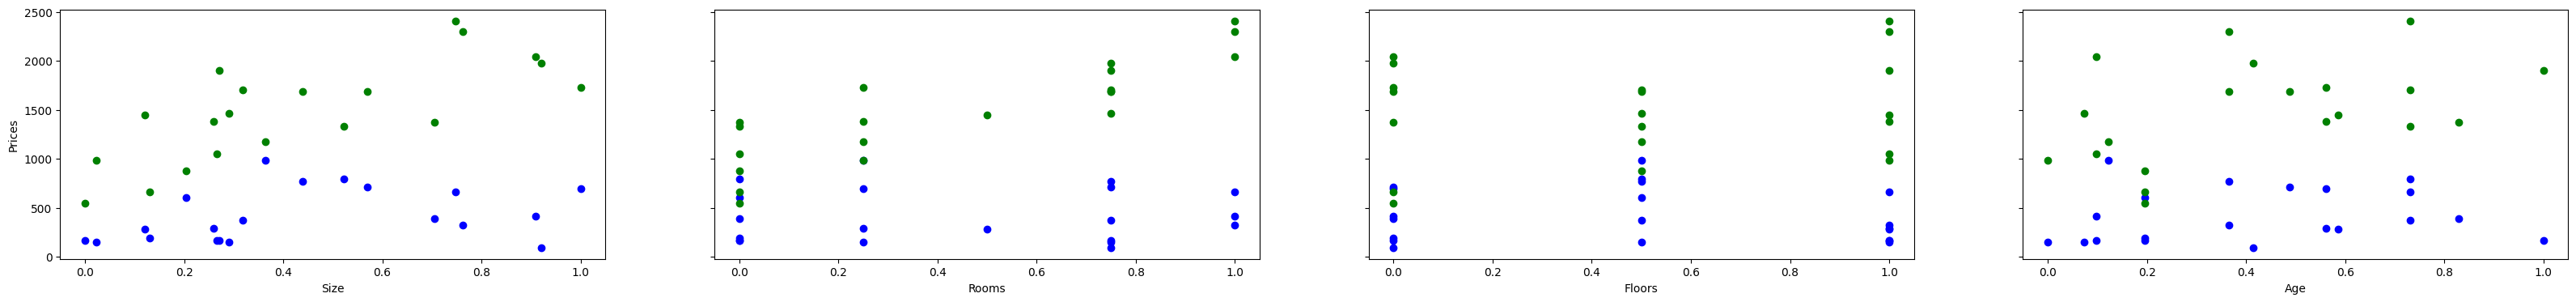

In [6]:
predicts = multipleLR(nx_train,w,b)
print(y_train)
print(predicts.round(2))

fig,ax = plt.subplots(1,n,figsize=(40,4),sharey=True)

for i in range(n):
    ax[i].scatter(nx_train[:,i],y_train,color="blue")
    ax[i].scatter(nx_train[:,i],predicts,color="green")
    ax[i].set_xlabel(x_features[i])
    
ax[0].set_ylabel("Prices")
plt.show()

## Cost Function
### Standard and Vectorized

In [7]:
def costFunction(x,y,w,b,m):
    # x = np.array[[x1,x2,x3...xn]
    #              [x1.....xn]
    #              [x1.....xn]
    #              [x1.....xn]]
    
    # y = np.array[y1.........yn]
    # w = np.array[weight1, weight 2, weight 3....weight n]
    # b = floatValue/Scalar
    # m = number of vectors in the matrix/training set
    
    cost_sum = 0.0
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
        
    cost_sum = (1 / (2 * m)) * cost_sum
    return cost_sum

def vectorizedCostFunction(x, y, w, b):
    """
    Calculates the cost for multiple linear regression

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors;   n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns_
    - normalized_cost
    """

    m = x.shape[0]

    # Calcular la predicción
    f_wb = np.dot(x, w) + b

    # Calcular el costo usando la fórmula del error cuadrático medio (MSE)
    cost = np.sum((f_wb - y) ** 2)
    normalized_cost = (1 / (2 * m)) * cost

    return normalized_cost

print("Standard Final Cost: ", costFunction(x_train,y_train,w,b,m))
print("Vectorized Final Cost: ", vectorizedCostFunction(x_train,y_train,w,b))

Standard Final Cost:  1347089393977.589
Vectorized Final Cost:  1347089393977.5889


## Gradient Function

In [8]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw, dj_db



def gradientFunction(x,y,w,b):
    """
    Calculates the gradient for w and b

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors;   n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns_
    - w, b = gradients
    """
    m,n = x.shape
    aux_w = np.zeros((n,))
    aux_b = 0.
    
    for i in range(m):
        
        cost = (np.dot(x[i], w) + b) - y[i]
        
        for j in range(n):
            aux_w[j] = aux_w[j] + cost * x[i,j]
        aux_b += cost
    
    aux_w = aux_w / m
    aux_b = aux_b / m
    
    return aux_w,aux_b


def vectorizedGradientFunction(x, y, w, b):
    """
    Calculates the gradient for w and b using vectorized operations

    Parameters:
    - x: Features Matrix (m x n), m = number of examples/vectors; n = features in each example/vector
    - y: Expected Results vector
    - w: weights's vector
    - b: bias's Scalar

    Returns:
    - dw, db = gradients
    """
    m, n = x.shape
    
    # Calcular la predicción
    f_wb = np.dot(x, w) + b
    
    # Calcular la diferencia entre la predicción y las etiquetas reales
    cost = f_wb - y
    
    # Calcular gradientes de w y b usando la vectorización de NumPy
    dw = (1 / m) * np.dot(x.T, cost)
    db = (1 / m) * np.sum(cost)
    
    return dw, db

i1_w, i1_b = vectorizedGradientFunction(x_train, y_train, w, b)
i2_w, i2_b = gradientFunction(x_train, y_train, w, b)
i3_w, i3_b = compute_gradient(x_train, y_train, w, b)

print("Correct w: ", i3_w)
print("Correct b: ", i3_b)
print("Standard w: ", i2_w)
print("Standard b: ", i2_b)
print("Vectorized w: ", i1_w)
print("Vectorized b: ", i1_b)


Correct w:  [3.07383376e+09 4.72857833e+06 3.02234111e+06 3.31733719e+07]
Correct b:  1577715.868997988
Standard w:  [3.07383376e+09 4.72857833e+06 3.02234111e+06 3.31733719e+07]
Standard b:  1577715.868997988
Vectorized w:  [3.07383376e+09 4.72857833e+06 3.02234111e+06 3.31733719e+07]
Vectorized b:  1577715.8689979878


## Gradient Descent

In [19]:
def GradientDescent(x,y,init_w,init_b,alpha,epochs):
    w = init_w
    b = init_b
    
    for i in range(epochs):
        aux_w,aux_b = gradientFunction(x,y,w,b)
        
        w = w - alpha * aux_w
        b = b - alpha * aux_b
        
        #Cost per Iteration:
        cost = vectorizedCostFunction(x,y,w,b)
        
        if i % 500 == 0:
            print(f"Epoch{i + 1} cost : {cost}\n weights:{w}\nBias:{b}")
        
    return w,b

print("Initial w: ", w)
print("Initial b: ", b)
alpha = 1.5e-2
epochs = 10000
aux_w,aux_b = GradientDescent(nx_train,y_train,w,b,alpha,epochs)
print("Final w: ",aux_w)
print("Final b: ",aux_b)
    
    





Initial w:  [871.47 731.74 299.35 331.38]
Initial b:  485.6329979877393
Epoch1 cost : 670965.6081930308
 weights:[863.11878859 722.10618949 290.56645113 323.89858405]
Bias:469.61111785438806
Epoch501 cost : 34806.73997427431
 weights:[445.50148887  76.12760445  52.66183889  72.50653364]
Bias:113.46665079257856
Epoch1001 cost : 30568.15219174394
 weights:[398.83636261 -60.35850443  49.86916644  70.34849171]
Bias:207.8039819333926
Epoch1501 cost : 29851.55677440603
 weights:[ 381.15721734 -113.1928929    39.58982332   66.3043963 ]
Bias:250.64355483704836
Epoch2001 cost : 29718.5378320798
 weights:[ 372.59142594 -133.32449562   32.2939736    62.6602793 ]
Bias:270.6316808089124
Epoch2501 cost : 29690.754017787825
 weights:[ 367.4950102  -140.5792367    27.90560541   60.04454848]
Bias:280.33300330193777
Epoch3001 cost : 29683.697668274377
 weights:[ 364.05105547 -142.81841179   25.278532     58.38929553]
Bias:285.2881028184173
Epoch3501 cost : 29681.355136219907
 weights:[ 361.56153277 -143

## Model Evaluation

[191.71 167.8  163.88 790.65  93.61 292.48 983.53 607.15 694.9  323.91
 368.74 285.5  664.76 414.66 151.77 169.83 710.39 766.3  390.59 149.03]
[ 663.79 1901.78  550.29 1332.26 1974.4  1379.79 1175.32  877.81 1725.93
 2302.2  1703.73 1449.71 2410.77 2042.13  987.68 1048.86 1692.62 1688.39
 1375.02 1461.19]
[349.82 360.12 303.76 528.68 536.77 400.83 402.74 385.68 643.29 462.25
 351.46 318.   478.07 479.42 285.01 411.63 416.77 373.48 589.49 303.87]


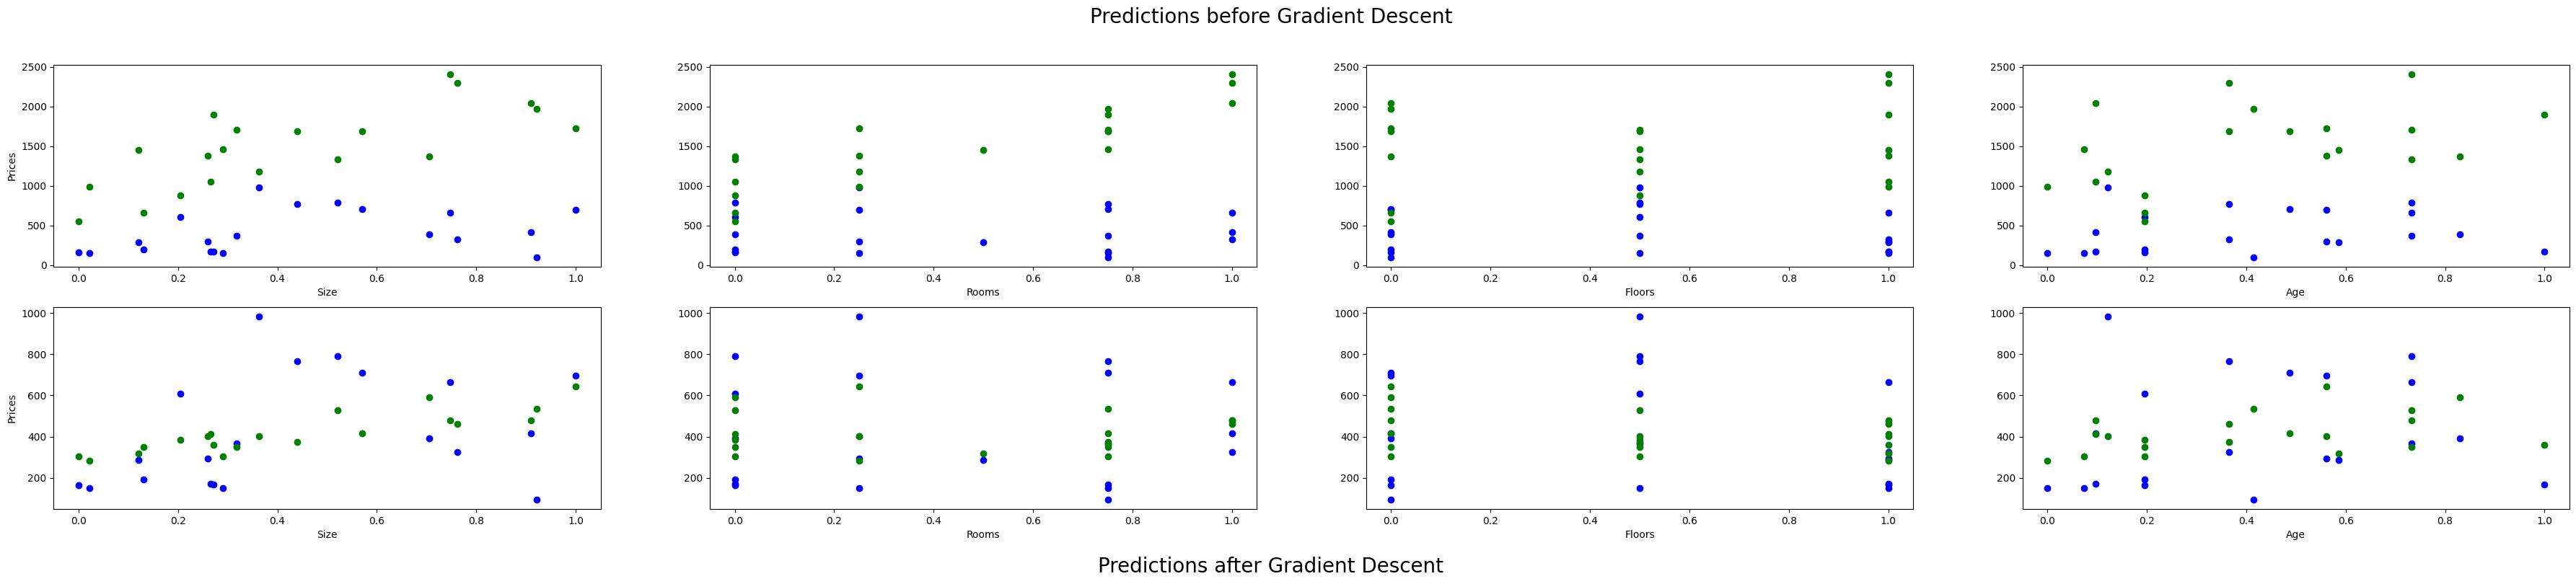

In [16]:
initialpredicts = multipleLR(nx_train, w, b)
finalpredicts = multipleLR(nx_train, aux_w, aux_b)
print(y_train)
print(initialpredicts.round(2))
print(finalpredicts.round(2))

fig, ax = plt.subplots(2, n, figsize=(45, 8))

for i in range(n):
    ax[0,i].scatter(nx_train[:,i],y_train,color="blue")
    ax[0,i].scatter(nx_train[:,i],initialpredicts,color="green")
    ax[1,i].scatter(nx_train[:,i],y_train,color="blue")
    ax[1,i].scatter(nx_train[:,i],finalpredicts,color="green")
    #for j in range(m):
    #    ax[0,i].annotate(f"P{j+1}",(nx_train[i,j],y_train[i]),ha='center')
    #    ax[0,i].annotate(f"Pr{j+1}",(nx_train[i,j],initialpredicts[i]),ha='center')
    #    ax[1,i].annotate(f"P{j+1}",(nx_train[i,j],y_train[i]),ha='center')
    #    ax[1,i].annotate(f"Pr{j+1}",(nx_train[i,j],finalpredicts[i]),ha='center')

for i in range(n):
    ax[0, i].set_xlabel(x_features[i])
    ax[1, i].set_xlabel(x_features[i])


# Establecer títulos para cada fila de la matriz
fig.suptitle("Predictions before Gradient Descent", fontsize=20)

# Establecer subtítulos para cada fila de la matriz
fig.text(0.5, 0, "Predictions after Gradient Descent", ha='center', fontsize=20)

ax[0, 0].set_ylabel("Prices")
ax[1, 0].set_ylabel("Prices")
plt.show()
